In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline 
np.random.seed(1337)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor

# Data Preprocessing

In [2]:
df_train = pd.read_csv('Train_dataset.csv', parse_dates=False, delimiter=" ", decimal=".", header=None)
df_test = pd.read_csv('Test_dataset.csv', parse_dates=False, delimiter=" ", decimal=".", header=None)
TrueTTF = pd.read_csv('TTF_dataset.csv', parse_dates=False, delimiter=" ", decimal=".", header=None)

In [3]:
headers=["unit (engine) number","time in cycles","operational setting 1","operational setting 2",\
         "operational setting 3","Total temperature at fan inlet","Total temperature at LPC outlet",\
         "Total temperature at HPC outlet","Total temperature at LPT outlet","Pressure at fan inlet",\
         "Total pressure in bypass-duct","Total pressure at HPC outlet","Physical fan speed",\
         "Physical core speed","Engine pressure ratio (P50/P2)","Static pressure at HPC outlet",\
         "Ratio of fuel flow to Ps30","Corrected fan speed","Corrected core speed","Bypass Ratio","Burner fuel-air ratio",\
         "Bleed Enthalp","Demanded fan speed","Demanded corrected fan speed","HPT coolant bleed","LPT coolant bleed","sen22","sen23"]
df_train.columns=headers
df_test.columns=headers
TrueTTF.columns= ['TTF']

In [4]:
df_train.head().T

,0,1,2,3,4
unit (engine) number,1.0000,1.0000,1.0000,1.0000,1.0000
time in cycles,1.0000,2.0000,3.0000,4.0000,5.0000
operational setting 1,-0.0007,0.0019,-0.0043,0.0007,-0.0019
operational setting 2,-0.0004,-0.0003,0.0003,0.0000,-0.0002
operational setting 3,100.0000,100.0000,100.0000,100.0000,100.0000
Total temperature at fan inlet,518.6700,518.6700,518.6700,518.6700,518.6700
Total temperature at LPC outlet,641.8200,642.1500,642.3500,642.3500,642.3700
Total temperature at HPC outlet,1589.7000,1591.8200,1587.9900,1582.7900,1582.8500
Total temperature at LPT outlet,1400.6000,1403.1400,1404.2000,1401.8700,1406.2200
Pressure at fan inlet,14.6200,14.6200,14.6200,14.6200,14.6200


In [5]:
df_test.head().T

,0,1,2,3,4
unit (engine) number,1.0000,1.0000,1.0000,1.0000,1.0000
time in cycles,1.0000,2.0000,3.0000,4.0000,5.0000
operational setting 1,0.0023,-0.0027,0.0003,0.0042,0.0014
operational setting 2,0.0003,-0.0003,0.0001,0.0000,0.0000
operational setting 3,100.0000,100.0000,100.0000,100.0000,100.0000
Total temperature at fan inlet,518.6700,518.6700,518.6700,518.6700,518.6700
Total temperature at LPC outlet,643.0200,641.7100,642.4600,642.4400,642.5100
Total temperature at HPC outlet,1585.2900,1588.4500,1586.9400,1584.1200,1587.1900
Total temperature at LPT outlet,1398.2100,1395.4200,1401.3400,1406.4200,1401.9200
Pressure at fan inlet,14.6200,14.6200,14.6200,14.6200,14.6200


In [6]:
TrueTTF.head()

,TTF
0,112
1,98
2,69
3,82
4,91


## Remove missing values

In [7]:
df_train.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
unit (engine) number,20631.0,51.506568,2.922763e+01,1.0000,26.0000,52.0000,77.0000,100.0000
time in cycles,20631.0,108.807862,6.888099e+01,1.0000,52.0000,104.0000,156.0000,362.0000
operational setting 1,20631.0,-0.000009,2.187313e-03,-0.0087,-0.0015,0.0000,0.0015,0.0087
operational setting 2,20631.0,0.000002,2.930621e-04,-0.0006,-0.0002,0.0000,0.0003,0.0006
operational setting 3,20631.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.0000,100.0000
Total temperature at fan inlet,20631.0,518.670000,6.537152e-11,518.6700,518.6700,518.6700,518.6700,518.6700
Total temperature at LPC outlet,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
Total temperature at HPC outlet,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
Total temperature at LPT outlet,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
Pressure at fan inlet,20631.0,14.620000,3.394700e-12,14.6200,14.6200,14.6200,14.6200,14.6200


In [8]:
df_test.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
unit (engine) number,13096.0,51.543907,2.828942e+01,1.0000,28.0000,52.0000,76.0000,100.0000
time in cycles,13096.0,76.836515,5.305775e+01,1.0000,33.0000,69.0000,113.0000,303.0000
operational setting 1,13096.0,-0.000011,2.202685e-03,-0.0082,-0.0015,0.0000,0.0015,0.0078
operational setting 2,13096.0,0.000004,2.940306e-04,-0.0006,-0.0002,0.0000,0.0003,0.0007
operational setting 3,13096.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.0000,100.0000
Total temperature at fan inlet,13096.0,518.670000,6.014263e-11,518.6700,518.6700,518.6700,518.6700,518.6700
Total temperature at LPC outlet,13096.0,642.475088,4.008993e-01,641.1300,642.1975,642.4600,642.7400,644.3000
Total temperature at HPC outlet,13096.0,1588.099204,5.003274e+00,1569.0400,1584.6000,1587.9900,1591.3625,1607.5500
Total temperature at LPT outlet,13096.0,1404.735362,6.688309e+00,1384.3900,1399.9500,1404.4400,1409.0500,1433.3600
Pressure at fan inlet,13096.0,14.620000,2.671743e-12,14.6200,14.6200,14.6200,14.6200,14.6200


In [9]:
df_train.isnull().sum(axis=0)

unit (engine) number                   0
time in cycles                         0
operational setting 1                  0
operational setting 2                  0
operational setting 3                  0
Total temperature at fan inlet         0
Total temperature at LPC outlet        0
Total temperature at HPC outlet        0
Total temperature at LPT outlet        0
Pressure at fan inlet                  0
Total pressure in bypass-duct          0
Total pressure at HPC outlet           0
Physical fan speed                     0
Physical core speed                    0
Engine pressure ratio (P50/P2)         0
Static pressure at HPC outlet          0
Ratio of fuel flow to Ps30             0
Corrected fan speed                    0
Corrected core speed                   0
Bypass Ratio                           0
Burner fuel-air ratio                  0
Bleed Enthalp                          0
Demanded fan speed                     0
Demanded corrected fan speed           0
HPT coolant blee

In [10]:
df_train.drop(['sen22','sen23'],axis = 1, inplace=True)
df_test.drop(['sen22','sen23'],axis = 1, inplace=True)

## Remove outliers and flat lines

In [11]:
P = df_train.describe().T
P

,count,mean,std,min,25%,50%,75%,max
unit (engine) number,20631.0,51.506568,2.922763e+01,1.0000,26.0000,52.0000,77.0000,100.0000
time in cycles,20631.0,108.807862,6.888099e+01,1.0000,52.0000,104.0000,156.0000,362.0000
operational setting 1,20631.0,-0.000009,2.187313e-03,-0.0087,-0.0015,0.0000,0.0015,0.0087
operational setting 2,20631.0,0.000002,2.930621e-04,-0.0006,-0.0002,0.0000,0.0003,0.0006
operational setting 3,20631.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.0000,100.0000
Total temperature at fan inlet,20631.0,518.670000,6.537152e-11,518.6700,518.6700,518.6700,518.6700,518.6700
Total temperature at LPC outlet,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
Total temperature at HPC outlet,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
Total temperature at LPT outlet,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
Pressure at fan inlet,20631.0,14.620000,3.394700e-12,14.6200,14.6200,14.6200,14.6200,14.6200


In [12]:
cols = []
for i in range(0,len(P)):
    if P.iloc[i,4] == P.iloc[i,5] == P.iloc[i,6]:
        cols.append(P.iloc[i].name)
cols

['operational setting 3',
 'Total temperature at fan inlet',
 'Pressure at fan inlet',
 'Total pressure in bypass-duct',
 'Engine pressure ratio (P50/P2)',
 'Burner fuel-air ratio',
 'Demanded fan speed',
 'Demanded corrected fan speed']

In [13]:
df_train.drop(cols,axis = 1, inplace=True)
df_test.drop(cols,axis = 1, inplace=True)

In [14]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
unit (engine) number,20631.0,51.506568,29.227633,1.0000,26.0000,52.0000,77.0000,100.0000
time in cycles,20631.0,108.807862,68.880990,1.0000,52.0000,104.0000,156.0000,362.0000
operational setting 1,20631.0,-0.000009,0.002187,-0.0087,-0.0015,0.0000,0.0015,0.0087
operational setting 2,20631.0,0.000002,0.000293,-0.0006,-0.0002,0.0000,0.0003,0.0006
Total temperature at LPC outlet,20631.0,642.680934,0.500053,641.2100,642.3250,642.6400,643.0000,644.5300
Total temperature at HPC outlet,20631.0,1590.523119,6.131150,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
Total temperature at LPT outlet,20631.0,1408.933782,9.000605,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
Total pressure at HPC outlet,20631.0,553.367711,0.885092,549.8500,552.8100,553.4400,554.0100,556.0600
Physical fan speed,20631.0,2388.096652,0.070985,2387.9000,2388.0500,2388.0900,2388.1400,2388.5600
Physical core speed,20631.0,9065.242941,22.082880,9021.7300,9053.1000,9060.6600,9069.4200,9244.5900


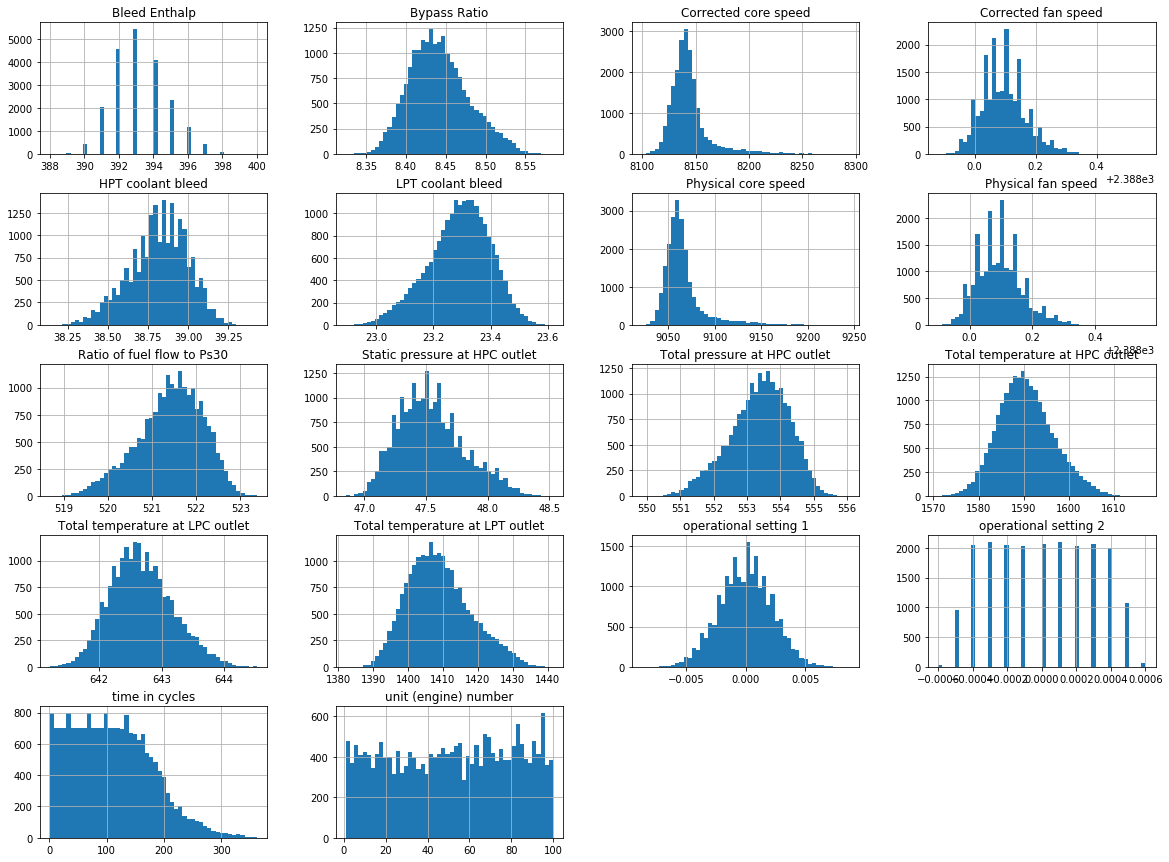

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
df_train.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

# Establishing TTF in Cycles

It is now about time to determine the time-to-failure (TTF) for the trainset, for each row.
First, we determine in the trainset for each row the max. cycles for the particular unit. We use the **groupby** command to obtain for every unit the max. number of cycles

In [16]:
#adding TTF column
# For each engine, we will calculate the maximum cycle reached. Then, for each row, 
# we will substract the current cycle number from that max.  
# make a dataframe to hold the last running cycle for each engine 
df_max = pd.DataFrame(df_train.groupby('unit (engine) number')['time in cycles'].max())
df_max.reset_index(level = 0, inplace = True)
df_max.columns = ['unit (engine) number', 'last_cycle']

We then determine the time to failure (TTF) for every row, which is the number of cycles subtracted from the maximum number of cycles in a particular unit.

\begin{equation*}
TTF_i = max(cycles) - cycles_i
\end{equation*}

In [17]:
# add time-to-failure as a new column to the training set
df_train = pd.merge(df_train, df_max, on = 'unit (engine) number')
df_train['TTF'] = df_train['last_cycle'] - df_train['time in cycles']
df_train.drop(['last_cycle'], axis = 1, inplace = True)
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
unit (engine) number,20631.0,51.506568,29.227633,1.0000,26.0000,52.0000,77.0000,100.0000
time in cycles,20631.0,108.807862,68.880990,1.0000,52.0000,104.0000,156.0000,362.0000
operational setting 1,20631.0,-0.000009,0.002187,-0.0087,-0.0015,0.0000,0.0015,0.0087
operational setting 2,20631.0,0.000002,0.000293,-0.0006,-0.0002,0.0000,0.0003,0.0006
Total temperature at LPC outlet,20631.0,642.680934,0.500053,641.2100,642.3250,642.6400,643.0000,644.5300
Total temperature at HPC outlet,20631.0,1590.523119,6.131150,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
Total temperature at LPT outlet,20631.0,1408.933782,9.000605,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
Total pressure at HPC outlet,20631.0,553.367711,0.885092,549.8500,552.8100,553.4400,554.0100,556.0600
Physical fan speed,20631.0,2388.096652,0.070985,2387.9000,2388.0500,2388.0900,2388.1400,2388.5600
Physical core speed,20631.0,9065.242941,22.082880,9021.7300,9053.1000,9060.6600,9069.4200,9244.5900


In [18]:
corr_matrix = df_train.corr()
corr_matrix["TTF"].sort_values(ascending=False)

TTF                                1.000000
Ratio of fuel flow to Ps30         0.671983
Total pressure at HPC outlet       0.657223
LPT coolant bleed                  0.635662
HPT coolant bleed                  0.629428
unit (engine) number               0.078753
operational setting 2             -0.001948
operational setting 1             -0.003198
Corrected core speed              -0.306769
Physical core speed               -0.390102
Corrected fan speed               -0.562569
Physical fan speed                -0.563968
Total temperature at HPC outlet   -0.584520
Bleed Enthalp                     -0.606154
Total temperature at LPC outlet   -0.606484
Bypass Ratio                      -0.642667
Total temperature at LPT outlet   -0.678948
Static pressure at HPC outlet     -0.696228
time in cycles                    -0.736241
Name: TTF, dtype: float64

In [19]:
df_train.columns

Index(['unit (engine) number', 'time in cycles', 'operational setting 1',
       'operational setting 2', 'Total temperature at LPC outlet',
       'Total temperature at HPC outlet', 'Total temperature at LPT outlet',
       'Total pressure at HPC outlet', 'Physical fan speed',
       'Physical core speed', 'Static pressure at HPC outlet',
       'Ratio of fuel flow to Ps30', 'Corrected fan speed',
       'Corrected core speed', 'Bypass Ratio', 'Bleed Enthalp',
       'HPT coolant bleed', 'LPT coolant bleed', 'TTF'],
      dtype='object')

In [20]:
features = ["operational setting 1","operational setting 2",\
            "Total temperature at LPC outlet","Total temperature at HPC outlet",\
            "Total temperature at LPT outlet","Total pressure at HPC outlet",\
            "Physical fan speed","Physical core speed",\
            "Static pressure at HPC outlet","Ratio of fuel flow to Ps30",\
            "Corrected fan speed","Corrected core speed",\
            "Bypass Ratio","Bleed Enthalp",\
            "HPT coolant bleed","LPT coolant bleed"]
#Fitting on the training set 
x_train = df_train.loc[:, features].values

#adding back the 'unit (engine) number','time in cycles' and 'TTF' columns
df_train1 = pd.DataFrame(x_train)
df_train1.columns = features
df_train1.insert (0, 'unit (engine) number', df_train["unit (engine) number"])
df_train1.insert (1, 'time in cycles', df_train["time in cycles"])
df_train1.insert (18, 'TTF', df_train['TTF'])

In [21]:
x_test = df_test.loc[:, features].values
df_test1 = pd.DataFrame(x_test)
df_test1.columns = features
df_test1.insert (0, 'unit (engine) number', df_test["unit (engine) number"])
df_test1.insert (1, 'time in cycles', df_test["time in cycles"])

In [22]:
df_train1.describe().T

,count,mean,std,min,25%,50%,75%,max
unit (engine) number,20631.0,51.506568,29.227633,1.0000,26.0000,52.0000,77.0000,100.0000
time in cycles,20631.0,108.807862,68.880990,1.0000,52.0000,104.0000,156.0000,362.0000
operational setting 1,20631.0,-0.000009,0.002187,-0.0087,-0.0015,0.0000,0.0015,0.0087
operational setting 2,20631.0,0.000002,0.000293,-0.0006,-0.0002,0.0000,0.0003,0.0006
Total temperature at LPC outlet,20631.0,642.680934,0.500053,641.2100,642.3250,642.6400,643.0000,644.5300
Total temperature at HPC outlet,20631.0,1590.523119,6.131150,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
Total temperature at LPT outlet,20631.0,1408.933782,9.000605,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
Total pressure at HPC outlet,20631.0,553.367711,0.885092,549.8500,552.8100,553.4400,554.0100,556.0600
Physical fan speed,20631.0,2388.096652,0.070985,2387.9000,2388.0500,2388.0900,2388.1400,2388.5600
Physical core speed,20631.0,9065.242941,22.082880,9021.7300,9053.1000,9060.6600,9069.4200,9244.5900


In [23]:
df_test1.describe().T

,count,mean,std,min,25%,50%,75%,max
unit (engine) number,13096.0,51.543907,28.289423,1.0000,28.0000,52.0000,76.0000,100.0000
time in cycles,13096.0,76.836515,53.057749,1.0000,33.0000,69.0000,113.0000,303.0000
operational setting 1,13096.0,-0.000011,0.002203,-0.0082,-0.0015,0.0000,0.0015,0.0078
operational setting 2,13096.0,0.000004,0.000294,-0.0006,-0.0002,0.0000,0.0003,0.0007
Total temperature at LPC outlet,13096.0,642.475088,0.400899,641.1300,642.1975,642.4600,642.7400,644.3000
Total temperature at HPC outlet,13096.0,1588.099204,5.003274,1569.0400,1584.6000,1587.9900,1591.3625,1607.5500
Total temperature at LPT outlet,13096.0,1404.735362,6.688309,1384.3900,1399.9500,1404.4400,1409.0500,1433.3600
Total pressure at HPC outlet,13096.0,553.757523,0.681286,550.8800,553.3100,553.8000,554.2400,555.8400
Physical fan speed,13096.0,2388.070964,0.057442,2387.8900,2388.0300,2388.0700,2388.1100,2388.3000
Physical core speed,13096.0,9058.407363,11.436261,9024.5300,9051.0200,9057.3200,9064.1100,9155.0300


In [24]:
#Merging the true TTF values with the test dataset

df_pr = pd.DataFrame(columns=features)
#We select the last entery for each unit in the test set then we append to it its corresponding True TTF value from TrueTTF
a=0
for i in range(0,len(df_test1)):
    if (df_test1['unit (engine) number'].values[i] != a):
            df_pr=df_pr.append(df_test1.iloc[i-1])
            a=a+1
df_test2 = df_pr.sort_values('unit (engine) number', axis=0, ascending=True).reset_index(drop=True)

In [25]:
X_train = df_train1[features] 
X_test = df_test2[features]
y_train = df_train1[['TTF']] 
y_test = TrueTTF[['TTF']]

In [26]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (20631, 16)
Training Labels Shape: (20631, 1)
Testing Features Shape: (100, 16)
Testing Labels Shape: (100, 1)


In [27]:
os_data_X = pd.DataFrame(data=X_train,columns=features)
os_data_y= pd.DataFrame(data=y_train,columns=['TTF'])

# Recursive Feature Elimination

In [28]:
linreg = LinearRegression()
rfe = RFE(linreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [29]:
data_X2 = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rfe.ranking_},)
data_X2.sort_values(by=['Importance'])

,Feature,Importance
0,operational setting 1,1
1,operational setting 2,1
2,Total temperature at LPC outlet,1
3,Total temperature at HPC outlet,1
4,Total temperature at LPT outlet,1
5,Total pressure at HPC outlet,1
6,Physical fan speed,1
7,Physical core speed,1
8,Static pressure at HPC outlet,1
9,Ratio of fuel flow to Ps30,1


In [30]:
col=[]
for i in range (0, len(data_X2["Importance"])):
    if data_X2["Importance"][i] == 1:
        col.append(data_X2["Feature"][i])
print(col)
print(len(col))

['operational setting 1', 'operational setting 2', 'Total temperature at LPC outlet', 'Total temperature at HPC outlet', 'Total temperature at LPT outlet', 'Total pressure at HPC outlet', 'Physical fan speed', 'Physical core speed', 'Static pressure at HPC outlet', 'Ratio of fuel flow to Ps30', 'Corrected fan speed', 'Corrected core speed', 'Bypass Ratio', 'Bleed Enthalp', 'HPT coolant bleed', 'LPT coolant bleed']
16


In [31]:
X=os_data_X[col]
y=os_data_y['TTF']

# Implementing the model

In [32]:
# Add a constant to the independent value
X1 = sm.add_constant(X)
# make regression model 
lin_model=sm.OLS(y,X1)
result=lin_model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    TTF   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     1775.
Date:                Fri, 10 Apr 2020   Prob (F-statistic):               0.00
Time:                        00:49:43   Log-Likelihood:            -1.0766e+05
No. Observations:               20631   AIC:                         2.153e+05
Df Residuals:                   20614   BIC:                         2.155e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [33]:
pvalue = pd.DataFrame(result.pvalues,columns={'p_value'},)
pvalue

,p_value
const,2.142248e-02
operational setting 1,7.142170e-01
operational setting 2,1.530419e-01
Total temperature at LPC outlet,1.527881e-11
Total temperature at HPC outlet,1.058763e-08
Total temperature at LPT outlet,4.611506e-25
Total pressure at HPC outlet,4.002931e-21
Physical fan speed,1.626102e-01
Physical core speed,4.360524e-09
Static pressure at HPC outlet,5.837486e-39


In [34]:
pvs=[]
for i in range (0, len(pvalue["p_value"])):
    if pvalue["p_value"][i] < 0.05:
        pvs.append(pvalue.index[i])
print(pvs)
print(len(pvs))  

['const', 'Total temperature at LPC outlet', 'Total temperature at HPC outlet', 'Total temperature at LPT outlet', 'Total pressure at HPC outlet', 'Physical core speed', 'Static pressure at HPC outlet', 'Ratio of fuel flow to Ps30', 'Corrected core speed', 'Bypass Ratio', 'Bleed Enthalp', 'HPT coolant bleed', 'LPT coolant bleed']
13


In [35]:
pvs1=[i for i in pvs if i not in 'const']
X=os_data_X[pvs1]
y=os_data_y['TTF']
if 'const' in pvs:
    X1 = sm.add_constant(X)
else:
    X1 = X
lin_model=sm.OLS(y,X1)
result=lin_model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    TTF   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     2366.
Date:                Fri, 10 Apr 2020   Prob (F-statistic):               0.00
Time:                        00:49:43   Log-Likelihood:            -1.0766e+05
No. Observations:               20631   AIC:                         2.153e+05
Df Residuals:                   20618   BIC:                         2.154e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [36]:
pvalue = pd.DataFrame(result.pvalues,columns={'p_value'},)
pvalue

,p_value
const,1.397835e-04
Total temperature at LPC outlet,2.018104e-12
Total temperature at HPC outlet,3.048671e-09
Total temperature at LPT outlet,2.413546e-27
Total pressure at HPC outlet,2.579491e-23
Physical core speed,6.468795e-09
Static pressure at HPC outlet,3.541967e-43
Ratio of fuel flow to Ps30,5.849266e-31
Corrected core speed,2.037976e-04
Bypass Ratio,1.038892e-16


In [37]:
pvs2=[]
for i in range (0, len(pvalue["p_value"])):
    if pvalue["p_value"][i] < 0.05:
        pvs2.append(pvalue.index[i])
print(pvs2)
print(len(pvs2))  

['const', 'Total temperature at LPC outlet', 'Total temperature at HPC outlet', 'Total temperature at LPT outlet', 'Total pressure at HPC outlet', 'Physical core speed', 'Static pressure at HPC outlet', 'Ratio of fuel flow to Ps30', 'Corrected core speed', 'Bypass Ratio', 'Bleed Enthalp', 'HPT coolant bleed', 'LPT coolant bleed']
13


In [38]:
pvs3=[i for i in pvs2 if i not in 'const']
X=os_data_X[pvs3]
y=os_data_y['TTF']
if 'const' in pvs2:
    X1 = sm.add_constant(X)
else:
    X1 = X
lin_model=sm.OLS(y,X1)
result=lin_model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    TTF   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     2366.
Date:                Fri, 10 Apr 2020   Prob (F-statistic):               0.00
Time:                        00:49:43   Log-Likelihood:            -1.0766e+05
No. Observations:               20631   AIC:                         2.153e+05
Df Residuals:                   20618   BIC:                         2.154e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

# Train and Build a Linear Regression Model

In [39]:
X_train.columns

Index(['operational setting 1', 'operational setting 2',
       'Total temperature at LPC outlet', 'Total temperature at HPC outlet',
       'Total temperature at LPT outlet', 'Total pressure at HPC outlet',
       'Physical fan speed', 'Physical core speed',
       'Static pressure at HPC outlet', 'Ratio of fuel flow to Ps30',
       'Corrected fan speed', 'Corrected core speed', 'Bypass Ratio',
       'Bleed Enthalp', 'HPT coolant bleed', 'LPT coolant bleed'],
      dtype='object')

In [40]:
X_train.drop(['operational setting 1', 'operational setting 2',\
              'Physical fan speed','Corrected fan speed'],axis = 1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [41]:
X_test.drop(['operational setting 1', 'operational setting 2',\
             'Physical fan speed','Corrected fan speed'],axis = 1, inplace=True)

In [42]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Calculate R squared

In [43]:
y_pred_l = regressor.predict(X_test)
print("Linear Regression R squared: ", "{:.2%}".format(regressor.score(X_test, y_test)))
print("In the Linear Regression model", "{:.2%}".format(regressor.score(X_test, y_test)), "of the variability in Y can be explained using X")

Linear Regression R squared:  40.07%
In the Linear Regression model 40.07% of the variability in Y can be explained using X


## Calculate root-mean-square error (RMSE)

In [44]:
lin_mse = mean_squared_error(y_pred_l, y_test)
lin_rmse = np.sqrt(lin_mse)
print('Linear Regression RMSE: ', '{:,}'.format(round(lin_rmse, 2)))
print("\nOur model was able to predict the Time-to-failure of every part of the engine in the test set", '{:,}'.format(round(lin_rmse, 2)) ,"of the Time-to-failure.")

Linear Regression RMSE:  32.17

Our model was able to predict the Time-to-failure of every part of the engine in the test set 32.17 of the Time-to-failure.


# Random Forest

In [45]:
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

## Calculate R squared

In [46]:
print("Random Forest R squared: ", "{:.2%}".format(forest_reg.score(X_test, y_test)))
print("\nIn the Random Forest Regressor model", "{:.2%}".format(forest_reg.score(X_test, y_test)), "of the variability in Y can be explained using X")

Random Forest R squared:  29.35%

In the Random Forest Regressor model 29.35% of the variability in Y can be explained using X


## Calculate root-mean-square error (RMSE)

In [47]:
y_pred_f = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_pred_f, y_test)
forest_rmse = np.sqrt(forest_mse)
print('Random Forest RMSE: ', '{:,}'.format(round(forest_rmse, 2)))

Random Forest RMSE:  34.93


# Gradient Boosting

In [48]:
model = ensemble.GradientBoostingRegressor()
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

## Calculate R squared

In [49]:
print("Gradient Boosting R squared: ", "{:.2%}".format(model.score(X_test, y_test)))
print("\nIn the Gradient Boosting Regressor model", "{:.2%}".format(model.score(X_test, y_test)), "of the variability in Y can be explained using X")

Gradient Boosting R squared:  38.69%

In the Gradient Boosting Regressor model 38.69% of the variability in Y can be explained using X


## Calculate root-mean-square error (RMSE)

In [50]:
y_pred_g = model.predict(X_test)
model_mse = mean_squared_error(y_pred_g, y_test)
model_rmse = np.sqrt(model_mse)
print('Gradient Boosting RMSE: ', '{:,}'.format(round(model_rmse, 2)))

Gradient Boosting RMSE:  32.54


# Choosing The best Model

In [51]:
a = round(lin_mse, 2)
b = round(forest_mse, 2)
c = round(model_mse, 2)
d = round(lin_rmse, 2)
e = round(forest_rmse, 2)
f = round(model_rmse, 2)
g = "{:.2%}".format(regressor.score(X_test, y_test))
h = "{:.2%}".format(forest_reg.score(X_test, y_test))
i = "{:.2%}".format(model.score(X_test, y_test))

In [52]:
df_Summary = pd.DataFrame({'RMSE': [d, e, f],
                   'RSQUARE': [g, h, i]},
                  index=['Linear Regression', 'Random Forest Regressor', 'Gradient Boosting Regressor'])
df_Summary

,RMSE,RSQUARE
Linear Regression,32.17,40.07%
Random Forest Regressor,34.93,29.35%
Gradient Boosting Regressor,32.54,38.69%


In [53]:
df_Summary['RMSE'].min()

32.17

In [54]:
"I would consider the Linear Regression model as my final model"

'I would consider the Linear Regression model as my final model'

# Prediction

In [55]:
print(X_train.columns)

Index(['Total temperature at LPC outlet', 'Total temperature at HPC outlet',
       'Total temperature at LPT outlet', 'Total pressure at HPC outlet',
       'Physical core speed', 'Static pressure at HPC outlet',
       'Ratio of fuel flow to Ps30', 'Corrected core speed', 'Bypass Ratio',
       'Bleed Enthalp', 'HPT coolant bleed', 'LPT coolant bleed'],
      dtype='object')


In [55]:
a = float(input("Please enter the Total temperature at LPC outlet:"))
b = float(input("Please enter the Total temperature at HPC outlet:"))
c = float(input("Please enter the Total temperature at LPT outlet:"))
d = float(input("Please enter the Total pressure at HPC outlet:"))
e = float(input("Please enter the Physical core speed:"))
f = float(input("Please enter the Static pressure at HPC outlet:"))
g = float(input("Please enter the Ratio of fuel flow to Ps30:"))
h = float(input("Please enter the Corrected core speed:"))
i = float(input("Please enter the Bypass Ratio:"))
j = float(input("Please enter the Bleed Enthalp:"))
k = float(input("Please enter the HPT coolant bleed:"))
l = float(input("Please enter the LPT coolant bleed:"))
new_data = np.array([a,b,c,d,e,f,g,h,i,j,k,l]).reshape(1,-1)
new_pred=regressor.predict(new_data)
result = float(new_pred[0])
print("The Time-to-failure for the part of the engine is : " ,round(result,2))

Please enter the Total temperature at LPC outlet:2
Please enter the Total temperature at HPC outlet:2
Please enter the Total temperature at LPT outlet:2
Please enter the Total pressure at HPC outlet:2
Please enter the Physical core speed:2
Please enter the Static pressure at HPC outlet:2
Please enter the Ratio of fuel flow to Ps30:2
Please enter the Corrected core speed:2
Please enter the Bypass Ratio:2
Please enter the Bleed Enthalp:22
Please enter the HPT coolant bleed:2
Please enter the LPT coolant bleed:2
The Time-to-failure for the part of the engine is :  3544.81
